#### **Integração Numérica - Método dos trapézios**

In [1]:
import numpy as np 
import pandas as pd
import sympy as sp 
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', 51)
pd.set_option('display.float_format', None)

Resolvendo a integral

$$
\int_{6}^{10} \log{x} \, dx
$$


entrada

In [2]:
a, b = 6, 10 
n_trapezios = 8
n_casas_decimais = 8

dom = np.linspace(a, b, n_trapezios+1)
img = np.log10(dom)

soma das áreas dos trapézios

In [3]:
h = (b - a) / (n_trapezios)
soma = img[0] + 2 * np.sum(img[1:-1]) + img[-1]
area = soma * (h/2)

print(f'Área aproximada: {area:.{n_casas_decimais}f}')

Área aproximada: 3.59331166


tabela

In [4]:
tabela = pd.DataFrame({'x': dom, 'f(x)': img})
tabela = tabela.round({'f(x)': n_casas_decimais})

pd.set_option('display.float_format', '{:.8f}'.format)

tabela


,x,f(x)
0,6.00000000,0.77815125
1,6.50000000,0.81291336
2,7.00000000,0.84509804
3,7.50000000,0.87506126
4,8.00000000,0.90308999
5,8.50000000,0.92941893
6,9.00000000,0.95424251
7,9.50000000,0.97772361
8,10.00000000,1.00000000


erro de arredondamento

In [5]:
decimal = 5 / (10 ** (n_casas_decimais + 1) )
erro_arr = n_trapezios * decimal * h

form = '.2e' if erro_arr < 0.00001 else f'.{n_casas_decimais}f'
intervalo1 =  f'({area:.{n_casas_decimais}f} ± {erro_arr:{form}})'
intervalo2 =  f'[{area - erro_arr:.{n_casas_decimais}f} ; {area+erro_arr:.{n_casas_decimais}f}]'

print(intervalo1, intervalo2, sep='\n\n')

(3.59331166 ± 2.00e-08)

[3.59331164 ; 3.59331168]


gráfico

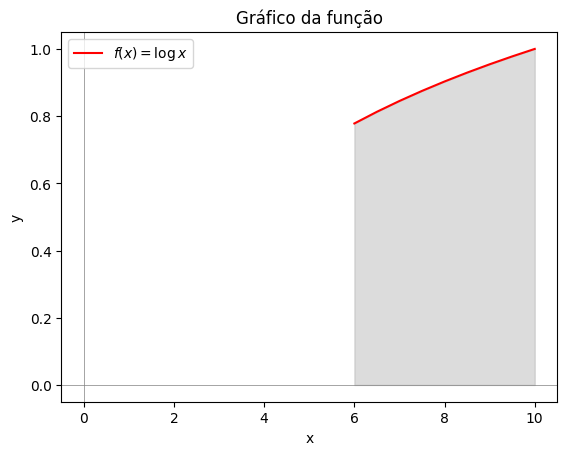

In [6]:
plt.plot(dom, img, label= r'$f(x) = \log{x} $', color='red')

plt.fill_between(dom, img, color='darkgrey', alpha=0.4, ) 
plt.title('Gráfico da função')

plt.xlabel('x'); plt.ylabel('y')
plt.axhline(0, color='gray',linewidth=0.5)  
plt.axvline(0, color='gray',linewidth=0.5) 

plt.legend(loc='upper left')

plt.show()


erro de truncamento

In [7]:
x = sp.Symbol('x')

put = sp.log(x, 10)
out = sp.diff(sp.diff(put))

function = sp.lambdify(x, out)

erro_trunc = n_trapezios * ((h**3) / (12)) * max(abs(function(a)), abs(function(b)))
form = '.2e' if erro_trunc < 0.00001 else f'.{n_casas_decimais}f'

print(f'{erro_trunc:{form}}')


0.00100531


erro total

In [8]:
erro_total = erro_arr + erro_trunc

form = '.2e' if erro_total < 0.00001 else f'.{n_casas_decimais}f'
intervalo1 =  f'({area:.{n_casas_decimais}f} ± {erro_total:{form}})'
intervalo2 =  f'[{area - erro_total:.{n_casas_decimais}f} ; {area+erro_total:.{n_casas_decimais}f}]'

print(intervalo1, intervalo2, sep='\n\n')

(3.59331166 ± 0.00100533)

[3.59230633 ; 3.59431699]
